# HW1

In [9]:
#imports
import pandas as pd
import sklearn as sk

In [10]:
#read data 
df = pd.read_csv('penguins.csv', header=None, names=['island', 'bill_length_mm', 'bill_depth_mm','flipper','body_mass_g','sex','species'])


## Q1
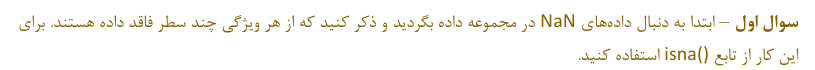


In [15]:
nan_values=df.isna()
# check for count
nan_values.sum()

island             0
bill_length_mm     2
bill_depth_mm      2
flipper            2
body_mass_g        2
sex               11
species            0
dtype: int64